In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

## Easy way to use the kaggle data set on cityscapes

In [ ]:
import json
token = {"username":"YOUR USER NAME","key":"USER KEY"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d huweicom/cityscapes-label

100% 101M/101M [00:02<00:00, 33.9MB/s] 



In [ ]:
!unzip /content/{/content}/datasets/huweicom/cityscapes-label/cityscapes-label.zip

Archive:  /content/{/content}/datasets/huweicom/cityscapes-label/cityscapes-label.zip
  inflating: get_index/train/1.png   
  inflating: get_index/train/10.png  
  inflating: get_index/train/100.png  
  inflating: get_index/train/1000.png  
  inflating: get_index/train/1001.png  
  inflating: get_index/train/1002.png  
  inflating: get_index/train/1003.png  
  inflating: get_index/train/1004.png  
  inflating: get_index/train/1005.png  
  inflating: get_index/train/1006.png  
  inflating: get_index/train/1007.png  
  inflating: get_index/train/1008.png  
  inflating: get_index/train/1009.png  
  inflating: get_index/train/101.png  
  inflating: get_index/train/1010.png  
  inflating: get_index/train/1011.png  
  inflating: get_index/train/1012.png  
  inflating: get_index/train/1013.png  
  inflating: get_index/train/1014.png  
  inflating: get_index/train/1015.png  
  inflating: get_index/train/1016.png  
  inflating: get_index/train/1017.png  
  inflating: get_index/train/1018.png  


In [ ]:
!kaggle datasets download -d huweicom/cityscapes-train

100% 7.15G/7.15G [02:45<00:00, 39.7MB/s]
100% 7.15G/7.15G [02:46<00:00, 46.3MB/s]


In [ ]:
!unzip /content/{/content}/datasets/huweicom/cityscapes-train/cityscapes-train.zip -d /content/cityscape_train

In [ ]:
!pip install scipy==1.2.2

     |████████████████████████████████| 24.8MB 129kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
from collections import namedtuple
Label = namedtuple( 'Label' , [

        'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

        'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

        'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

        'category'    , # The name of the category that this label belongs to

        'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

        'hasInstances', # Whether this label distinguishes between single instances or not

        'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

        'color'       , # The color of this label
        ] )

In [ ]:
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (0, 0,0) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 255,255,255) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  255,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
        
]

In [ ]:
'''
You should not edit helper.py as part of your submission.

This file is used primarily to download vgg if it has not yet been,
give you the progress of the download, get batches for your training,
as well as around generating and saving the image outputs.
'''

import re
import random
import numpy as np
import os.path
import scipy.misc
import shutil
import zipfile
import time
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from glob import glob
from urllib.request import urlretrieve
from tqdm import tqdm
import cv2

from utils import  DLProgress , maybe_download_pretrained_vgg , gen_batch_function , gen_test_output , save_inference_samples

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import os.path
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import helper
import warnings
from distutils.version import LooseVersion


# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))


from model import  load_vgg , layers , optimize , restore_model


TensorFlow Version: 2.3.0
Default GPU Device: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np 
import torch.nn.functional as F

# PyTroch version
SMOOTH = 1e-6
fig = plt.figure(figsize=(10,10))
from utils import  plot_results , iou_result , convert , plot_img
from train import  run , train_nn

<Figure size 720x720 with 0 Axes>

## Data Visualization

In [ ]:
#lets plot some data for convinence
gd_data = "data/data_road/training/gt_image_2"
img_data ="data/data_road/training/image_2"
from os import listdir
from os.path import isfile, join
img_files = [f for f in listdir(img_data) if isfile(join(img_data, f))]
gd_files = [f for f in listdir(gd_data) if isfile(join(gd_data, f))]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
#plot some random images
def plot(gd_path , ori_path):
    #read the images
    ori_img = np.array(Image.open(ori_path).convert("RGB"))
    gd_img =  np.array(Image.open(gd_path).convert("RGB"))
    #lets get weighted sum
    cv2.addWeighted(ori_img , 0.8 , gd_img , 2.0 , 1.0 , ori_img)
    
    plt.imshow(ori_img)
    plt.title("Overlay of Ground Truth and Original Image")
    plt.show()  

In [ ]:
for i in range(13,16,1):
    img_file = img_files[i]
    img_num = img_files[i][-10:]
    img_type = img_files[i][-14:-11]
    ori_path = img_data+"/" + str(img_file)
    if(type=="umm"):
        gd_path = gd_data+"/" + str(img_type)+"_"+"road_"+str(img_num)
    if(img_type=='um'):
        gd_path = gd_data+"/" + str(img_type)+"_"+"lane_"+str(img_num)
    plot(gd_path , ori_path)

0.00B [00:00, ?B/s]

997MB [00:46, 21.4MB/s]                           


Extracting model...
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from /kaggle/working/vgg/variables/variables
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `t

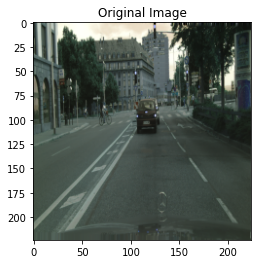

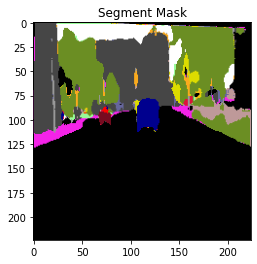

Training >>>>> Epoch : 0 Epoch Loss : 0.19287391103083087 Epoch accuracy : 0.674
Working
Training >>>>> Epoch : 1 Epoch Loss : 0.18736413537815053 Epoch accuracy : 0.680
Working
Training >>>>> Epoch : 2 Epoch Loss : 0.18594357034852427 Epoch accuracy : 0.682
Working
Training >>>>> Epoch : 3 Epoch Loss : 0.18570438059427405 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 4 Epoch Loss : 0.18622496644014952 Epoch accuracy : 0.683
Working


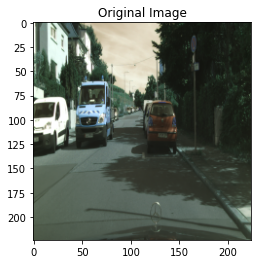

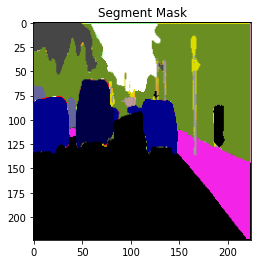

Training >>>>> Epoch : 5 Epoch Loss : 0.18730316335155117 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 6 Epoch Loss : 0.18843541045983633 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 7 Epoch Loss : 0.1895624126798363 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 8 Epoch Loss : 0.1901197914154299 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 9 Epoch Loss : 0.19058470764467794 Epoch accuracy : 0.683
Working


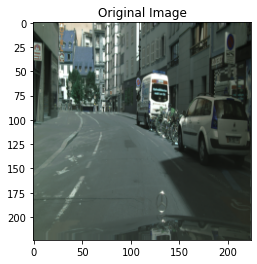

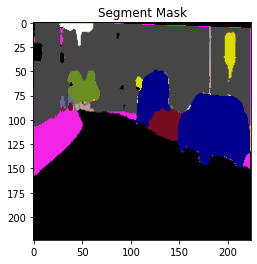

Training >>>>> Epoch : 10 Epoch Loss : 0.19187153891850545 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 11 Epoch Loss : 0.19281001004480547 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 12 Epoch Loss : 0.19222023217908799 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 13 Epoch Loss : 0.19051644862979972 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 14 Epoch Loss : 0.18926230858090104 Epoch accuracy : 0.683
Working


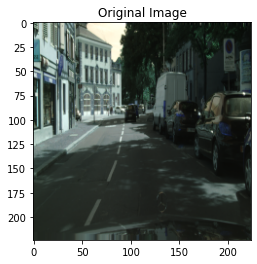

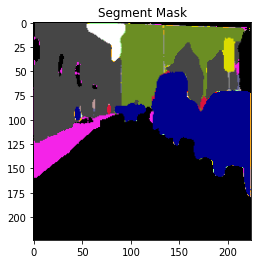

Training >>>>> Epoch : 15 Epoch Loss : 0.18972120698421233 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 16 Epoch Loss : 0.19007121603335103 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 17 Epoch Loss : 0.18988806794407548 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 18 Epoch Loss : 0.18904830627543953 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 19 Epoch Loss : 0.18746091825987704 Epoch accuracy : 0.683
Working


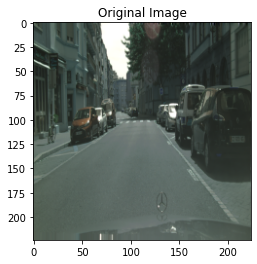

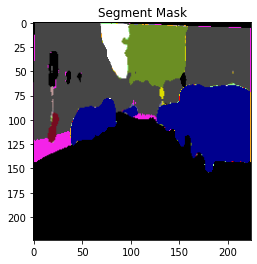

Training >>>>> Epoch : 20 Epoch Loss : 0.1857343223146213 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 21 Epoch Loss : 0.18400108045147312 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 22 Epoch Loss : 0.18269394786768062 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 23 Epoch Loss : 0.1815063206739323 Epoch accuracy : 0.683
Working
Training >>>>> Epoch : 24 Epoch Loss : 0.18105159972303658 Epoch accuracy : 0.684
Working


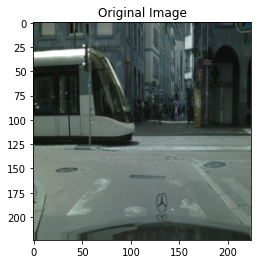

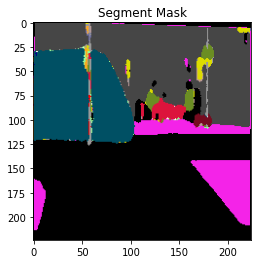

Training >>>>> Epoch : 25 Epoch Loss : 0.18123389908703424 Epoch accuracy : 0.684
Working
Training >>>>> Epoch : 26 Epoch Loss : 0.18193473066053084 Epoch accuracy : 0.684
Working
Training >>>>> Epoch : 27 Epoch Loss : 0.182827700209874 Epoch accuracy : 0.684
Working


In [ ]:
if __name__ == '__main__':
    run()